In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("sample_superstore.csv")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      999 non-null    object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')


In [22]:
df[['Order Date']].head()


,Order Date
0,2014-11-11
1,2014-02-05
2,2014-10-17
3,2014-01-28
4,2014-11-05


In [24]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

In [30]:
Total_Sales=df['Sales'].sum()
Total_Sales

1710971.47

In [43]:
total_profit = df['Profit'].sum()
total_profit



288920.44000000006

In [45]:
total_orders = df['Order ID'].nunique()
total_orders


867

In [47]:
avg_sales = df['Sales'].mean()
avg_sales


1710.97147

In [51]:
region_sales = region_sales.sort_values(ascending=False)
region_sales


Region
Western Europe       259576.28
Oceania              220809.08
Southern Asia        205466.26
Eastern Asia         193590.60
Southeastern Asia    147337.60
Central America      140966.21
Northern Europe      103888.63
Southern Europe       94441.11
South America         64550.54
Eastern Europe        45662.19
Central Africa        33810.48
Western Asia          33308.21
Caribbean             30746.74
North Africa          26266.44
Southern Africa       22262.28
Eastern Africa        17387.94
Central US            17187.94
Western US            16729.95
Western Africa        15478.79
Eastern US            12256.44
Southern US            8360.75
Canada                  887.01
Name: Sales, dtype: float64

In [53]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales


Category
Furniture          601492.31
Office Supplies    352496.14
Technology         756983.02
Name: Sales, dtype: float64

In [57]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales


Month
April         86287.99
August       190780.27
December     225442.22
February      94091.23
January      110939.14
July          82563.72
June         181401.64
March         83064.62
May          127209.72
November     191481.01
October      156310.63
September    177697.76
Name: Sales, dtype: float64

In [59]:
import matplotlib.pyplot as plt


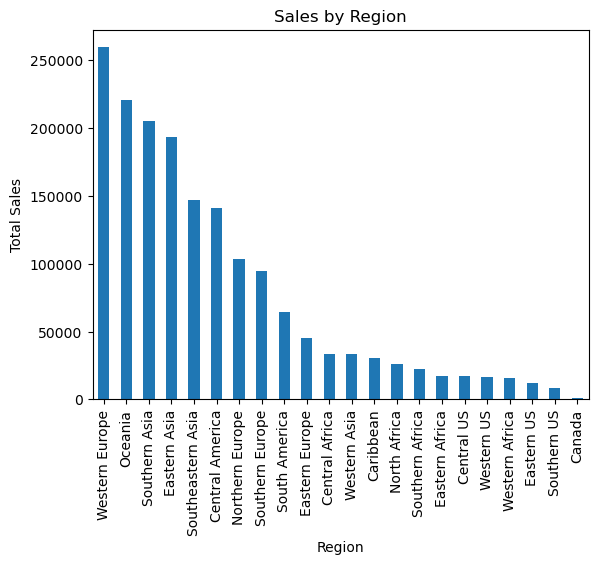

In [61]:
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


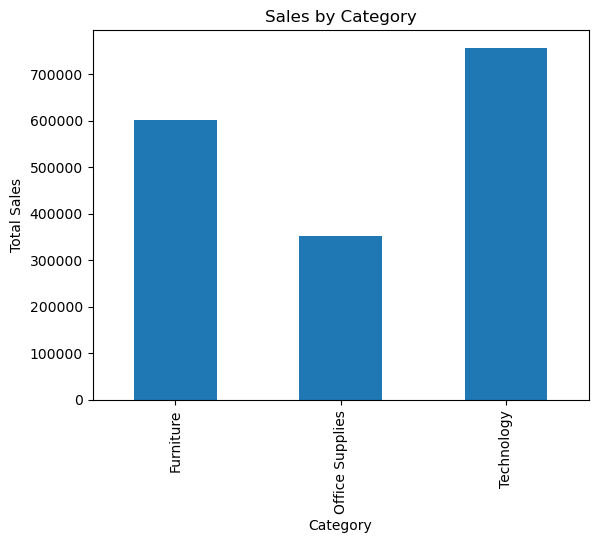

In [63]:
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


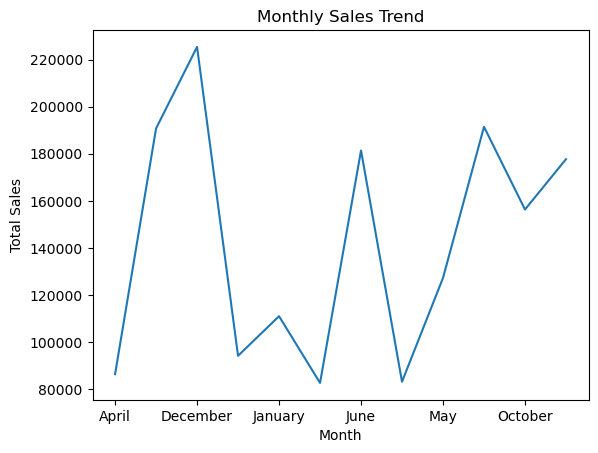

In [65]:
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Sales Performance Dashboard

## Project Objective
To analyze sales data and identify key performance trends to support business decision-making.

## Dataset
Sample Superstore sales dataset containing order details, sales, profit, category, region, and dates.

## Tools Used
- Python
- Pandas
- Matplotlib
- Jupyter Notebook

## Key KPIs
- Total Sales
- Total Profit
- Total Orders
- Average Sales per Order

## Analysis Performed
- Region-wise sales analysis
- Category-wise sales analysis
- Monthly sales trend analysis

## Key Insights
- Certain regions generate higher sales compared to others
- One category contributes the most to overall revenue
- Sales show seasonal trends across months
